In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys 
import os
import networkx as nx
from collections import Counter, defaultdict
import EoN

# define path to the project for convenoent relative import
sys.path.append(os.path.dirname(os.getcwd())) 
from source.model_output import SEIRModelOutput, SEIRParams
from source.SEIR_network import SEIRNetworkModel


In [1]:
# class SEIRNetworkModel():
#     def __init__(self, population: int):
#         self.population = population
        
#         # FOLLOWING PARAMETERS ARE EPIDEMICALLY DETERMINED
#         # R_0 HERE LIES IN RANGE [1; 2.5]
#         self.min_params = SEIRParams(beta=1/9, gamma=1/5, delta=1/9, init_inf_frac=1e-6, init_rec_frac=1e-2)
#         self.max_params = SEIRParams(beta=0.625, gamma=1, delta=1/4, init_inf_frac=1e-3, init_rec_frac=2e-1)
#         self.last_sim_params = None
        
#         self.G=nx.barabasi_albert_graph(population, 5)
    
#     @staticmethod
#     def find_nearest_idx(array, value):
#         array = np.asarray(array)
#         idx = (np.abs(array - value)).argmin()
#         return idx
    
#     def transform_event_times_to_days(self, model_output, tmax):
#         indices = []
#         for day in range(tmax):
#             index = self.find_nearest_idx(model_output.t, day)
#             indices.append(index)
#         new_model_output = SEIRModelOutput(model_output.t[indices], model_output.S[indices],
#                                         model_output.E[indices], model_output.I[indices],
#                                         model_output.R[indices])
#         return new_model_output
                

#     def simulate(self, beta=1/7*1.5, gamma=1/2, delta=1/7, init_inf_frac=1e-4, init_rec_frac=0.15, tmax: int = 150):
#         '''
#         Parameters:
        
#         beta: transmission rate
#         gamma: rate of progression from exposed to infectious
#         delta: recovery rate
#         init_inf_frac: fraction of initially infected
#         init_rec_frac: fraction of initially recovered
#         '''
#         H = nx.DiGraph()
#         H.add_edge('E', 'I', rate=gamma)
#         H.add_edge('I', 'R', rate=delta)
#         J = nx.DiGraph()
#         J.add_edge(('I', 'S'), ('I', 'E'), rate=beta)
#         initial_infected = int(init_inf_frac*self.population)
#         initial_status = defaultdict(lambda: 'S')
#         for node in range(initial_infected):
#             initial_status[node] = 'I'
#         self.result = self.transform_event_times_to_days(SEIRModelOutput\
#                         (*EoN.Gillespie_simple_contagion(self.G, H, J, initial_status, \
#                         return_statuses=('S', 'E', 'I', 'R'), tmax=tmax)), tmax)
#         return self.result

In [2]:
tmax = 180
iterations = 5  # run 5 simulations
beta = 0.01 # transmission rate
delta = 0.08 # recovery rate
init_inf_frac = 0.005 # random fraction initially infected
init_rec_frac = 0.005
gamma = 0.1 # latent period rate

num_runs = 10

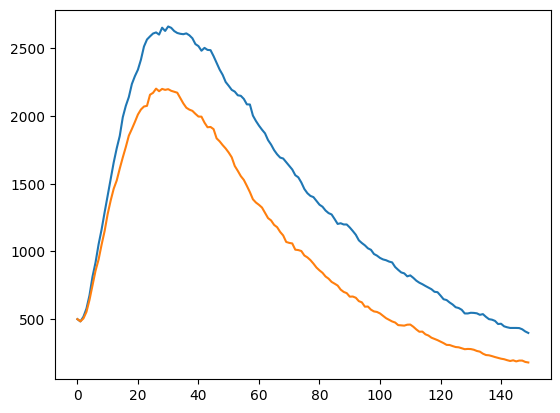

In [5]:
network_model = SEIRNetworkModel(10**5)
for init_rec_frac in [0.05, 0.1]:
    res = network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=init_rec_frac)
    plt.plot(res.I)